<img src='https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/1_keras_fashion_mnist_neural_net/Slide1.PNG'>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

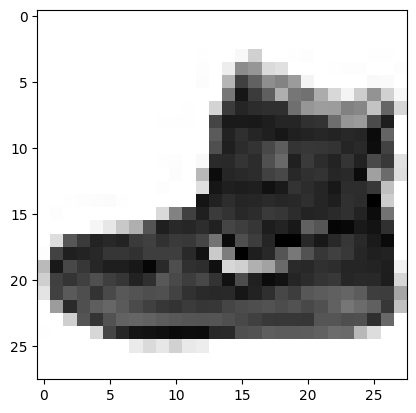

In [3]:
plt.imshow(X_train[0], cmap='Greys')

In [4]:
y_train[0]

np.uint8(9)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

<h3 style='color:purple'>Normalize training data before training the neural net</h3>

In [7]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

---
<h1>สร้างโมเดลโดยใช้โครงสร้างแบบ ANN</h1>


In [8]:
ANN_model = keras.Sequential()
ANN_model.add(keras.layers.Flatten(input_shape=[28, 28]))
ANN_model.add(keras.layers.Dense(100, activation="relu"))
ANN_model.add(keras.layers.Dense(10, activation="softmax"))

c:\Users\acezg\.conda\envs\cs461\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
ANN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
ANN_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [11]:
history_ANN_model = ANN_model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7755 - loss: 0.6494
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8576 - loss: 0.3909
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8743 - loss: 0.3452
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8842 - loss: 0.3147
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8913 - loss: 0.2958


In [12]:
ANN_model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8718 - loss: 0.3494


[0.354266494512558, 0.8697999715805054]

In [13]:
im=X_test_scaled[0:5,:,:]

In [14]:
prediction_result=ANN_model.predict(im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [15]:
prediction_result

array([[1.9229160e-06, 6.2917205e-09, 3.0024569e-06, 1.2879609e-06,
        1.7515531e-06, 6.4713657e-03, 6.7574742e-06, 2.1047018e-02,
        1.0978327e-04, 9.7235703e-01],
       [1.4791406e-05, 4.5487208e-10, 9.7943246e-01, 2.1460979e-08,
        6.6898130e-03, 3.8576507e-11, 1.3862475e-02, 2.0177384e-15,
        4.4051637e-07, 3.0905052e-15],
       [2.0248601e-07, 9.9999976e-01, 4.3014711e-12, 3.4023611e-08,
        1.0470734e-08, 2.6958185e-17, 8.2758739e-10, 2.9161047e-20,
        2.7957034e-11, 3.7119508e-15],
       [1.6984369e-06, 9.9998832e-01, 2.1472535e-09, 9.7269194e-06,
        1.2193426e-07, 1.4514081e-14, 2.9449250e-08, 9.0852080e-19,
        6.1646832e-10, 2.5207454e-11],
       [8.9548871e-02, 1.3420446e-05, 1.8128389e-02, 2.5333914e-03,
        2.0944946e-02, 2.2551512e-07, 8.6844361e-01, 3.9965012e-06,
        3.8300353e-04, 8.0437509e-08]], dtype=float32)

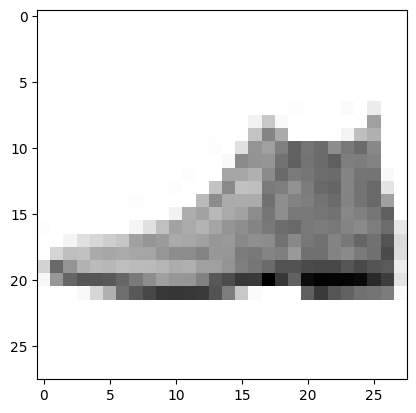

In [16]:
plt.imshow(X_test[0], cmap='Greys')

In [17]:
np.argmax(prediction_result[0,:])

np.int64(9)

In [18]:
ANN_model.save('ANN_fasion_mnist.keras')

---
<h1>สร้างโมเดลโดยใช้โครงสร้างแบบ CNN</h1>

In [19]:
CNN_model = keras.Sequential()


##### ตัวอย่าง Convolution Layer with RELU activation function and Pooling Layer(Max pooling)#####
CNN_model.add(keras.layers.Conv2D(
    filters=5, # How many filters we will learn
    kernel_size=(3, 3), # Size of filters
    strides=(1, 1), # How the filter "steps" across the image
    activation='relu', # Rectified Linear Unit Activation Function
    input_shape=(28, 28, 1) # The expected input shape for this layer
))

CNN_model.add(keras.layers.MaxPooling2D(
    pool_size=(2, 2), # Size feature will be mapped to
    strides=(2, 2) # How the pool "steps" across the feature
))


##### Flatten Layer #####
CNN_model.add(keras.layers.Flatten())


##### Fully Connected Layer #####
CNN_model.add(keras.layers.Dense(
    units=64,
    activation='relu'
))


# Output Layer
CNN_model.add(keras.layers.Dense(
    units=10,
    activation='softmax'
))


c:\Users\acezg\.conda\envs\cs461\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
CNN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 5)      │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 845)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        54,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,844 (214.23 KB)

 Trainable params: 54,844 (214.23 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
CNN_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [22]:
history_CNN_model = CNN_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6895 - loss: 5.1612
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8367 - loss: 0.4804
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8684 - loss: 0.3666
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8825 - loss: 0.3215
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8914 - loss: 0.2979


In [23]:
CNN_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8855 - loss: 0.3414


[0.34650206565856934, 0.8805999755859375]

In [24]:
CNN_model.save('CNN_fasion_mnist.keras')

---
<h1>เปรียบเทียบโมเดลแบบ CNN และ ANN </h1>

In [25]:
history_CNN_model.history.keys()

dict_keys(['accuracy', 'loss'])

In [26]:
history_ANN_model.history.keys()

dict_keys(['accuracy', 'loss'])

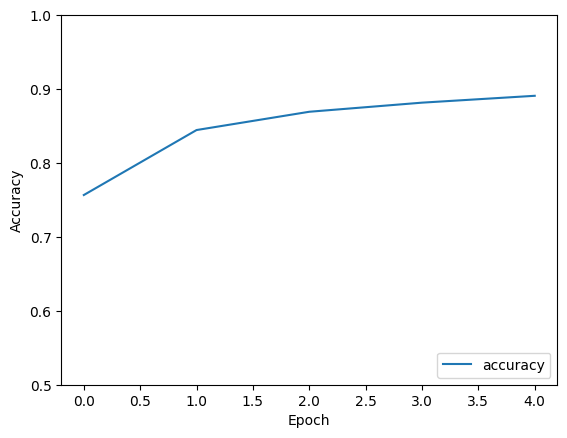

In [27]:
plt.plot(history_CNN_model.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

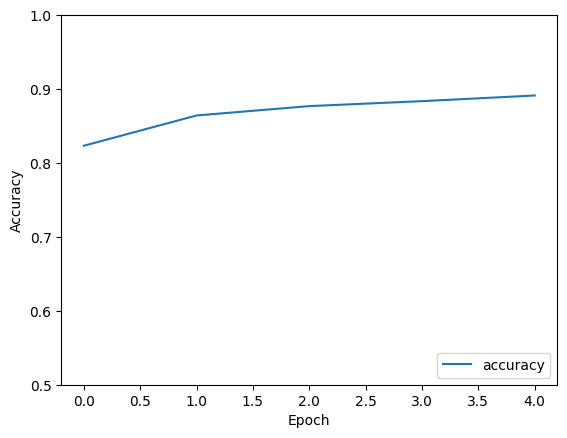

In [28]:
plt.plot(history_ANN_model.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')